In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from paraspec.base import IR12SpeciationModel

%matplotlib inline

# Run the model in a static landscape

In [2]:
length = (25, 25)
spacing = (1, 1)

X, Y = np.meshgrid(*[np.arange(0, l+s, s)
                     for l, s in zip(length, spacing)])

r = np.random.RandomState(0)

elevation = Y * 100 + r.rand(*X.shape) 

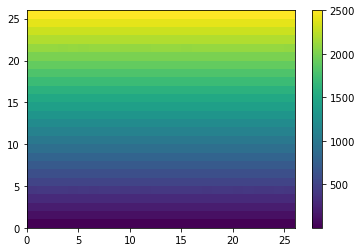

In [3]:
plt.pcolormesh(elevation)
plt.colorbar();

In [4]:
pop_size = 100

model = IR12SpeciationModel(X, Y, pop_size,
                                  nb_radius=5, capacity=28,
                                  sigma_w=50, sigma_d=0.5, sigma_mut=50,
                                  lifespan=1, m_freq=0.05, random_seed=1234)

model.initialize([elevation.min(), elevation.max()])

dfs = []

for step in range(50):
    model.evaluate_fitness(elevation, 5)

    if step % 5 == 0:
        dfs.append(model.to_dataframe())
    
    model.update_population(5)
    
population = pd.concat(dfs)

In [5]:
population.head()

,step,time,dt,id,parent,x,y,trait,r_d,opt_trait,fitness,n_offspring
0,0,0.0,0.0,0,0,24.417494,7.446002,1868.920680,3.111111,700.679393,2.857893e-119,0
1,0,0.0,0.0,1,1,9.504893,15.479025,5.199898,2.000000,1500.401260,6.544800e-195,0
2,0,0.0,0.0,2,2,23.081156,7.543936,2024.187795,3.111111,800.213312,7.507784e-131,0
3,0,0.0,0.0,3,3,6.542311,4.371161,2017.816779,2.545455,400.846409,7.930893e-228,0
4,0,0.0,0.0,4,4,7.977426,12.387630,136.404222,3.111111,1200.270328,4.921957e-99,0


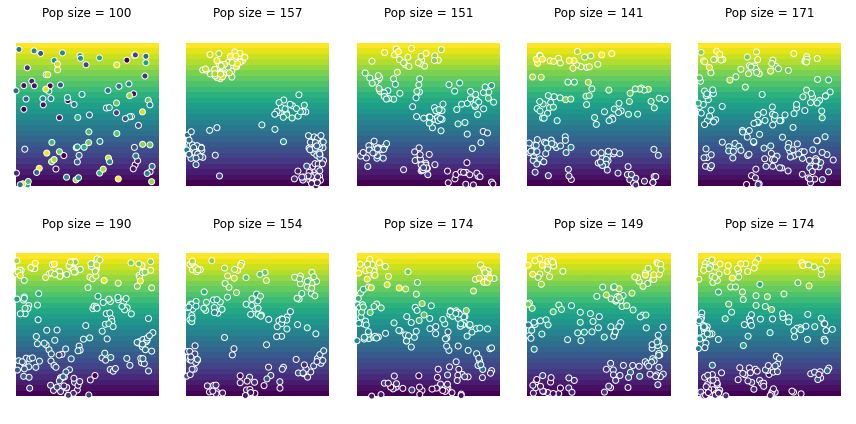

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

for ax, (_, pop) in zip(axes.ravel(), population.groupby('step')):
    ax.pcolormesh(elevation)
    ax.scatter(pop.x, pop.y, c=pop.trait, edgecolor='w')
    ax.set_title(f'Pop size = {len(pop)}')
    ax.axis('equal')
    ax.axis('off')

fig.tight_layout()